# Start Here: A Gentle Introduction - Third Try

## 1. Imports

In [2]:
# 데이터 조작
import numpy as np
import pandas as pd

# 카테고리형 피처 처리
from sklearn.preprocessing import LabelEncoder

# 파일 관리
import os

# 경고 제외
import warnings
warnings.filterwarnings('ignore')

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read in Data

In [3]:
print(os.listdir('../data/'))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [4]:
# 학습 데이터
app_train = pd.read_csv('../data/application_train.csv')
print('학습 데이터의 크기 :', app_train.shape)
app_train.head()

학습 데이터의 크기 : (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 테스트 데이터
app_test = pd.read_csv('../data/application_test.csv')
print('테스트 데이터의 크기 :', app_test.shape)
app_test.head()

테스트 데이터의 크기 : (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Exploratory Data Analysis
### 3.1. Examine the Distribution of the Target Column

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

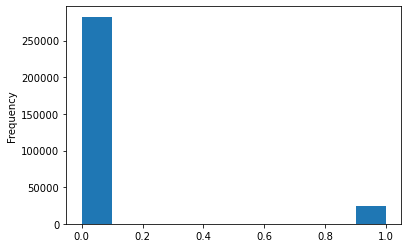

In [7]:
app_train['TARGET'].plot.hist()

### 3.2. Examine Missing Values

In [8]:
# 결측치 비율을 계산 및 결측치 정보 데이트프레임 생성
def missing_values_table(df):
    mis_val = df.isnull().sum()             # 결측치 개수
    mis_val_perc = 100 * mis_val / len(df)  # 결측치 비율

    # 결측치 개수와 결측치 비율로 데이터프레임 생성
    mis_val_table = pd.concat([mis_val, mis_val_perc], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'missing values', 1: '% of total values'})

    # 결측치 비율을 기준으로 역정렬
    # 1. 결측치 비율 컬럼만 추출
    # 2. 해당 컬럼을 기준으로 역으로 정렬
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of total values', ascending=False).round(1)

    # 결과 출력
    print('데이터프레임은 총 {}개의 피처를 가진다.'.format(df.shape[1]))
    print('{}개의 피처 중 {}개의 피처가 결측치를 가진다.'.format(
        df.shape[1], mis_val_table_ren_columns.shape[0]))

    return mis_val_table_ren_columns

In [9]:
missing_values = missing_values_table(app_train)
missing_values.head(30)

데이터프레임은 총 122개의 피처를 가진다.
122개의 피처 중 67개의 피처가 결측치를 가진다.


,missing values,% of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### 3.3. Column Types

In [10]:
# 자료형 별 피처의 개수
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# 카테고리형 피처의 고유값(unique value)의 개수
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### 3.4. Encoding Categorical Variables
#### 3.4.1. Label Encoding and One-hot Encoding

In [12]:
# 라벨 인코딩
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        # 카테고리가 2개인지 확인
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            
            # 학습/테스트 데이터에 적용
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # 인코딩된 컬럼 카운팅
            le_count += 1

print('{}개의 컬럼이 라벨 인코딩(Label Encoding)되었다.'.format(le_count))

3개의 컬럼이 라벨 인코딩(Label Encoding)되었다.


In [13]:
# 원-핫 인코딩
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('학습 데이터의 크기 :', app_train.shape)
print('테스트 데이터의 크기 :', app_test.shape)

학습 데이터의 크기 : (307511, 243)
테스트 데이터의 크기 : (48744, 239)


#### 3.4.2. Aligning Training and Testing Data

In [14]:
train_labels = app_train['TARGET']

# 학습/테스트 데이터의 공통 피처만 보존
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# 분리한 target 피처를 다시 추가
app_train['TARGET'] = train_labels

print('학습 데이터의 크기 :', app_train.shape)
print('테스트 데이터의 크기 :', app_test.shape)

학습 데이터의 크기 : (307511, 240)
테스트 데이터의 크기 : (48744, 239)


### 3.5. Back to Exploratory Data Analysis
#### 3.5.1. Anomalies

In [15]:
# 비정상 데이터가 의심되는 DAYS_BIRTH 피처 통계
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [16]:
# 비정상 데이터가 의심되는 DAYS_EMPLOYED 피처 통계
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'days employment')

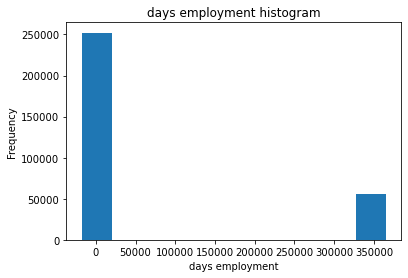

In [17]:
# DAYS_EMPLOYED의 분포 - hist
app_train['DAYS_EMPLOYED'].plot.hist(title='days employment histogram')
plt.xlabel('days employment')

In [18]:
# 비정상 데이터가 정상 데이터에 비해 대출 상환 비율이 높은지 비교
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print('정상 데이터의 {:.2f}%가 대출 상환을 한다.'.format(100*non_anom['TARGET'].mean()))
print('비정상 데이터의 {:.2f}%가 대출 상환을 한다.'.format(100*anom['TARGET'].mean()))
print('전체 데이터 중 {}개가 비정상 데이터이다.'.format(len(anom)))

정상 데이터의 8.66%가 대출 상환을 한다.
비정상 데이터의 5.40%가 대출 상환을 한다.
전체 데이터 중 55374개가 비정상 데이터이다.


Text(0.5, 0, 'days employment')

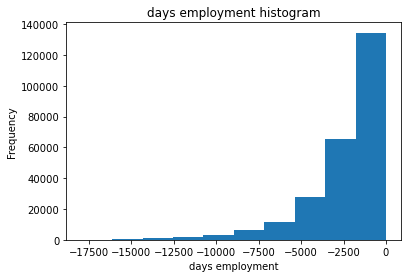

In [19]:
# 비정상 데이터 플래그 컬럼 생성
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# 비정상 데이터의 값을 NaN으로 변환
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# 처리 후 DAYS_EMPLOYED 시각화 - hist
app_train['DAYS_EMPLOYED'].plot.hist(title='days employment histogram')
plt.xlabel('days employment')

In [20]:
# 테스트 데이터에 동일 적용
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('전체 {}개의 데이터 중 {}개가 비정상 데이터이다.'.format(
    app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

전체 9274개의 데이터 중 48744개가 비정상 데이터이다.


#### 3.5.2. Correlations

In [21]:
# target과의 상관계수를 기준으로 정렬
correlations = app_train.corr()['TARGET'].sort_values()

print('가장 큰 양의 상관계수를 가진 TOP 15:\n', correlations.tail(15))
print()
print('가장 큰 음의 상관계수를 가진 TOP 15:\n', correlations.head(15))

가장 큰 양의 상관계수를 가진 TOP 15:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

가장 큰 음의 상관계수를 

#### 3.5.3. Effect of Age on Repayment

In [22]:
# DAYS_BIRTH에 절대값을 취함
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# 변환된 DAYS_BIRTH와 target과의 상관계수
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

Text(0, 0.5, 'count')

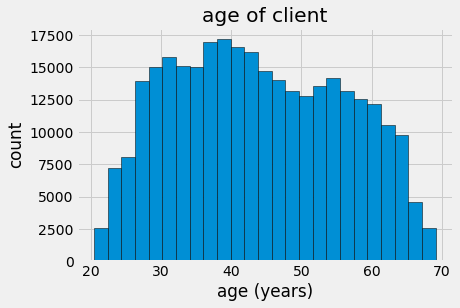

In [23]:
plt.style.use('fivethirtyeight')

# DAYS_BIRTH 분포 - hist
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('age of client')
plt.xlabel('age (years)')
plt.ylabel('count')

Text(0.5, 1.0, 'distribution of age')

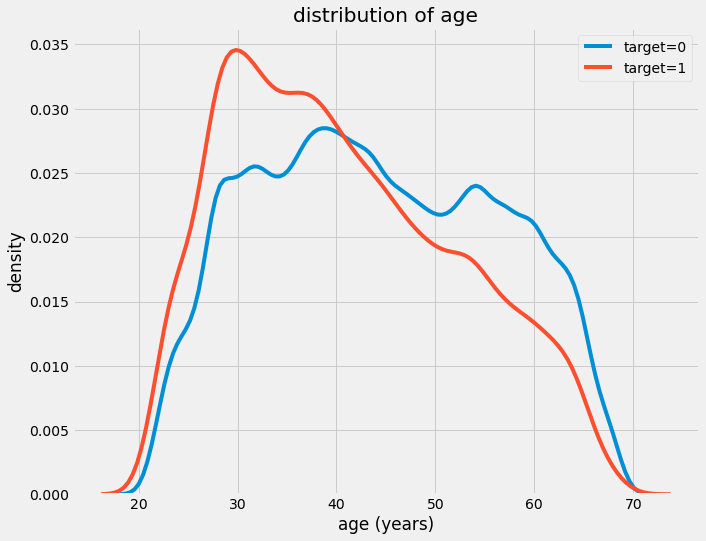

In [24]:
plt.figure(figsize=(10, 8))

# target의 값별 사람의 나이(DAYS_BIRTH) 분포 - kdeplot
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target=0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target=1')

plt.xlabel('age (years)')
plt.ylabel('density')
plt.title('distribution of age')

In [25]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365    # 일에서 년 단위로 변환

# 11개로 나이대를 분리
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [26]:
# 나이대별 target의 평균
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'failure to repay by age group')

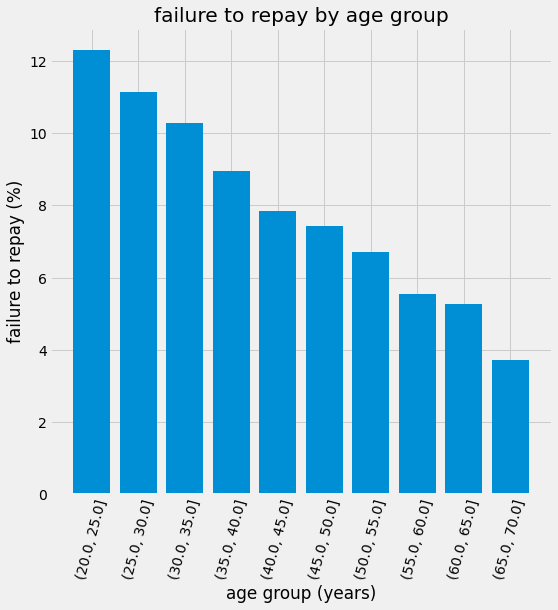

In [27]:
plt.figure(figsize=(8, 8))

# 각 나이대 별 target의 평균 - barplot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('age group (years)')
plt.ylabel('failure to repay (%)')
plt.title('failure to repay by age group')

#### 3.5.4. Exterior Sources

In [28]:
# EXT_SOURCE와 target의 상관계수
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'correlation heatmap')

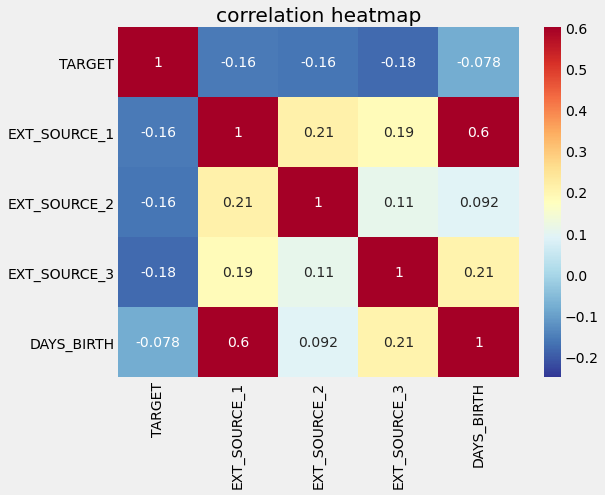

In [29]:
plt.figure(figsize=(8, 6))

# EXT_SOURCE와 target의 상관관계 - heatmap
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('correlation heatmap')

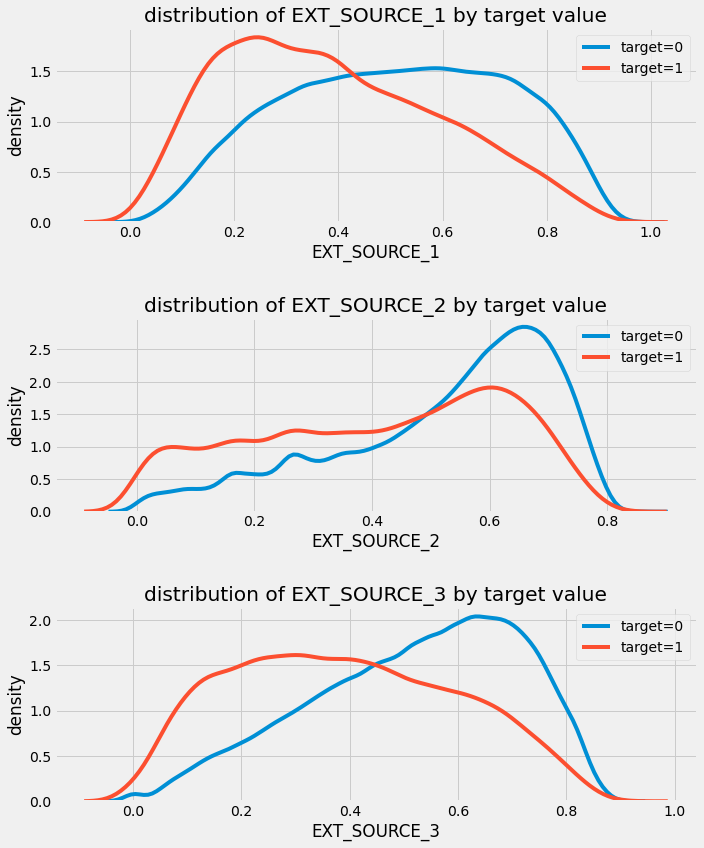

In [30]:
plt.figure(figsize=(10, 12))

# EXT_SOURCE의 target의 값별 분포 - kdeplot
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target=0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='target=1')
    
    plt.title('distribution of {} by target value'.format(source))
    plt.xlabel(str(source))
    plt.ylabel('density')

# subplot 사이의 간격 조절
plt.tight_layout(h_pad=2.5)

### 3.6. Pairs Plot

In [31]:
plot_data = ext_data.drop(columns='DAYS_BIRTH').copy()

# DAYS_BIRTH 대신 YEARS_BIRTH 추가
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# NaN값 제외 및 10,000개의 데이터만 추출
plot_data = plot_data.dropna().loc[:10000, :]

In [32]:
# 두 피처 간 상관계수를 계산
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate('r={:.2f}'.format(r),
               xy=(.2, .8),
               xycoords=ax.transAxes,
               size=20)

Text(0.5, 1.05, 'ext source and age features pairs plot')

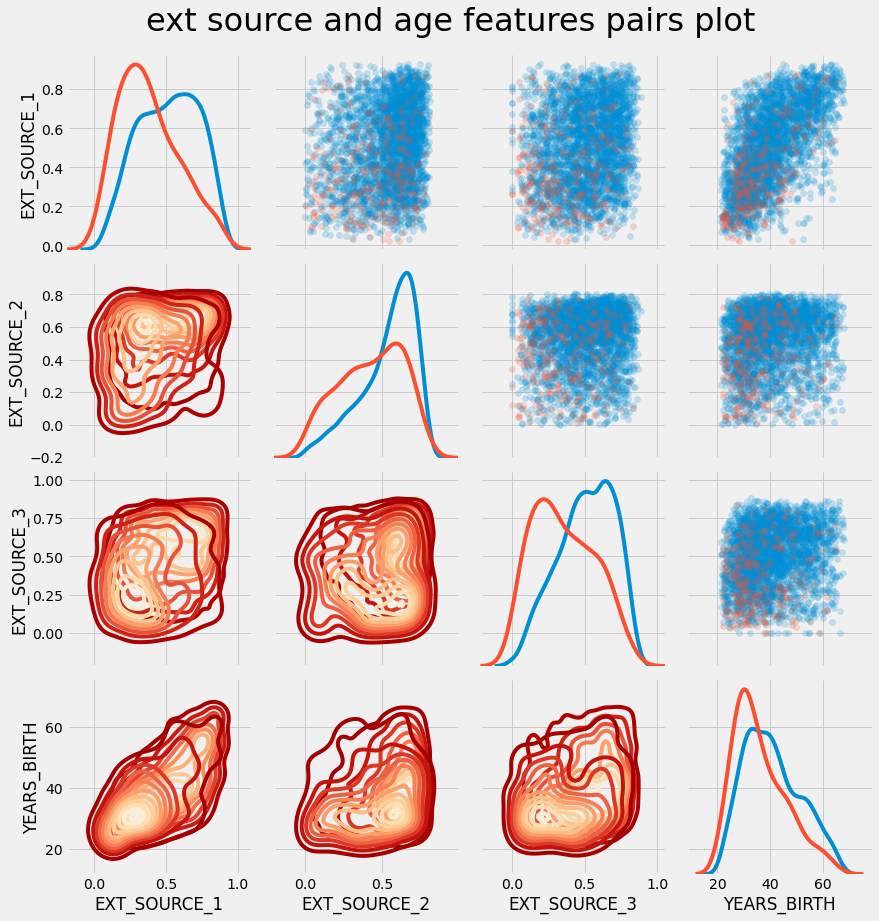

In [33]:
# pairgrid 객체 생성
grid = sns.PairGrid(data=plot_data,
                   size=3,
                   diag_sharey=False,
                   hue='TARGET',
                   vars=[x for x in list(plot_data.columns) if x != 'TARGET'])

# 상단 삼각형 - scatterplot
grid.map_upper(plt.scatter, alpha=0.2)
# 대각선 - kdeplot
grid.map_diag(sns.kdeplot)
# 하단 삼각형 - kdeplot
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)

plt.suptitle('ext source and age features pairs plot', size=32, y=1.05)

## 4. Feature Engineering

### 4.1. Polynomial Features

In [34]:
# Polynomail 피처를 만들 변수 추출
poly_features = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# target과 다른 피처들 분리
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns=['TARGET'])

# 결측치 채우기
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# 차수 3의 PolynomialFeatures 객체 생성
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)

# 학습/테스트 데이터 적용
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

print('Polynomial 피처 생성 후 poly_features의 크기 :', poly_features.shape)

Polynomial 피처 생성 후 poly_features의 크기 : (307511, 35)


In [37]:
# 생성된 피처 중 15개만 출력
poly_transformer.get_feature_names(
    input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [38]:
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names(
    input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# target 피처 추가
poly_features['TARGET'] = poly_target

# 상관계수 계산 및 역정렬
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print('가장 큰 양의 상관계수를 가진 TOP 10: \n', poly_corrs.tail(10))
print()
print('가장 큰 음의 상관계수를 가진 TOP 10: \n', poly_corrs.head(10))

가장 큰 양의 상관계수를 가진 TOP 10: 
 EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64

가장 큰 음의 상관계수를 가진 TOP 10: 
 EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float

In [39]:
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names(
    input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# SK_ID_CURR 추가
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

# 학습/테스트 데이터의 공통 피처만 보존
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

print('Polynomial 피처가 있을 때의 학습 데이터의 크기 :', app_train_poly.shape)
print('Polynomial 피처가 있을 때의 테스트 데이터의 크기 :', app_test_poly.shape)

Polynomial 피처가 있을 때의 학습 데이터의 크기 : (307511, 275)
Polynomial 피처가 있을 때의 테스트 데이터의 크기 : (48744, 275)


### 4.2. Domain Knowledge Features
* `CREDIT_INCOME_PERCENT` : 고객의 소득 대비 신용 거래의 비율
* `ANNUITY_INCOME_PERCENT` : 고객 소득 대비 대출 연금의 비율
* `CREDIT_TERM` : 원 납입기간 (연금이 월 납입액이기 때문)
* `DAYS_EMPLOYED_PERCENT` : 고객 나이 대비 고용 일수의 비율

In [40]:
# 도메인 지식 관련 피처 전용 데이터프레임 생성
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

In [41]:
# 학습 데이터의 도메인 지식 피처 생성
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / \
    app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / \
    app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / \
    app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / \
    app_train_domain['DAYS_BIRTH']

In [42]:
# 테스트 데이터의 도메인 지식 피처 생성
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / \
    app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / \
    app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / \
    app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / \
    app_test_domain['DAYS_BIRTH']

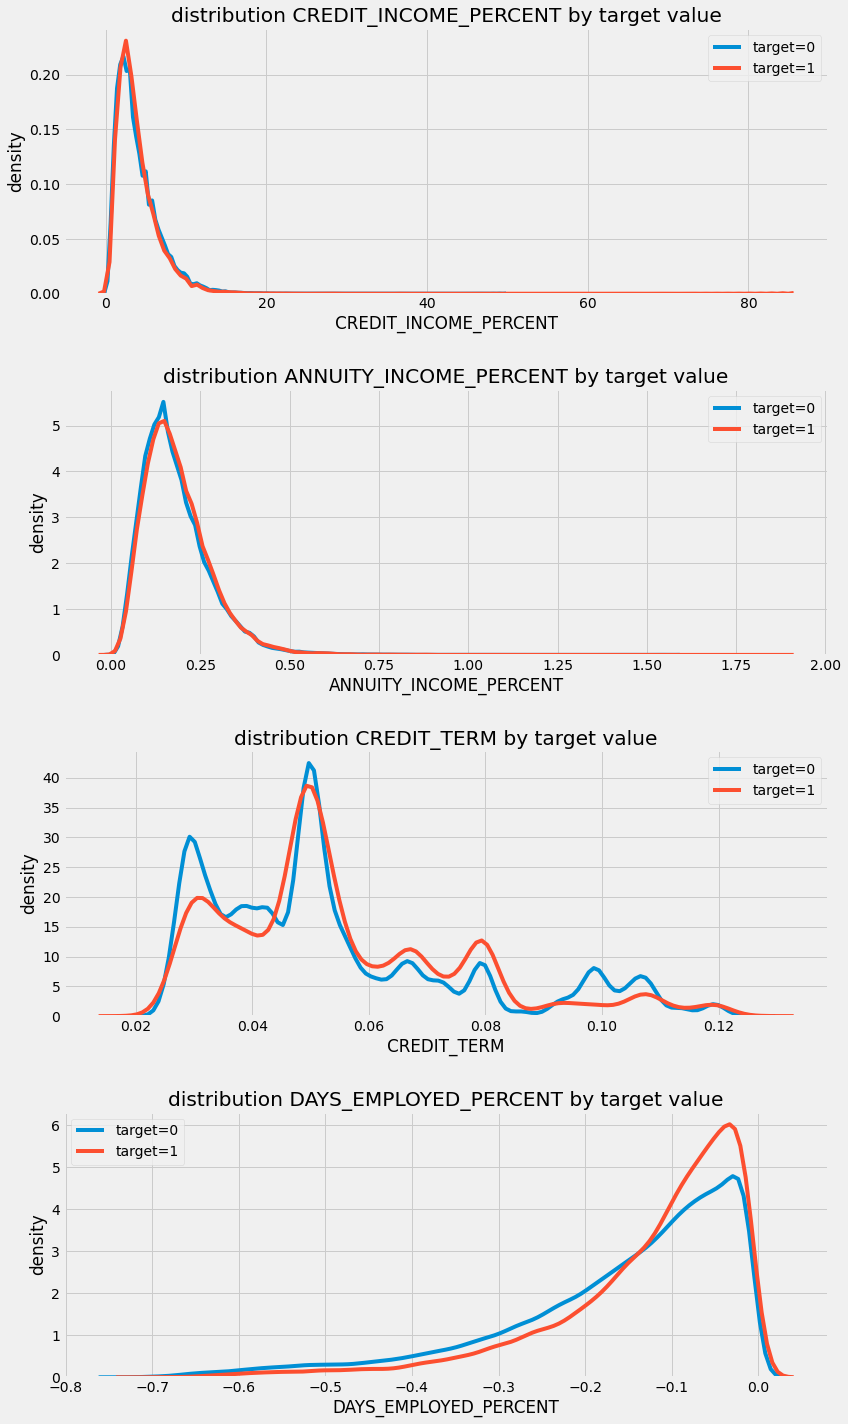

In [43]:
plt.figure(figsize=(12, 20))

# 새로 생성한 도메인 지식 피처의 분포 - kdeplot
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature], label='target=0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature], label='target=1')
    
    plt.title('distribution {} by target value'.format(feature))
    plt.xlabel(str(feature))
    plt.ylabel('density')
    
# subplot 사이 간격 조절
plt.tight_layout(h_pad=2.5)

## 5. Baseline
### 5.1. Logistic Regression Implementation

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# target 피처 분리
if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()

features = list(train.columns)    # 피처 이름 추출
test = app_test.copy()            # 테스트 데이터 복사

# 결측치 채우기
imputer = SimpleImputer(strategy='median')
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(app_test)

# 0과 1사이의 값으로 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('학습 데이터의 크기 :', train.shape)
print('테스트 데이터의 크기 :', test.shape)

학습 데이터의 크기 : (307511, 240)
테스트 데이터의 크기 : (48744, 240)


In [45]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
# 규제 계수 설정 - 낮을수록 오버피팅 감소
log_reg = LogisticRegression(C=0.0001)

# 모델 학습
log_reg.fit(train, train_labels)

# 모델 확률 예측
# 첫 번째 컬럼: target=0, 두 번째 컬럼: target=1
log_reg_pred = log_reg.predict_proba(test)[:,1]

In [46]:
# submission 포맷에 맞춰 데이터프레임 생성
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


In [47]:
# submission 파일 저장
submit.to_csv('../data/log_reg_baseline_3.csv', index=False)

👉 **로지스틱 회귀 모델의 ROC-AUC** : 0.678

### 5.2. Improved Model: Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# 모델 학습
random_forest.fit(train, train_labels)

# 특성 중요도(feature importance) 추출
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# 모델 예측
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


In [49]:
# submission 포맷에 맞춰 데이터프레임 생성
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# submission 파일 저장
submit.to_csv('../data/random_forest_baseline_3.csv', index=False)

👉 **랜덤 포레스트 모델의 ROC-AUC** : 0.678

### 5.3. Make Predictions using Engineered Features
#### 5.3.1. Polynomial Features

In [50]:
poly_features_names = list(app_train_poly.columns)

# 결측치 채우기
imputer = SimpleImputer(strategy='median')
poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# 0과 1사이의 값으로 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

In [51]:
# 랜덤 포레스트 모델 생성
random_forest_poly = RandomForestClassifier(
    n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


In [52]:
# submission 포맷에 맞춰 데이터프레임 생성
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# submission 파일 저장
submit.to_csv('../data/random_forest_baseline_engineered_3.csv', index=False)

👉 **Polynomial 피처를 포함한 랜덤 포레스트 모델의 ROC-AUC** : 0.678

### 5.3.2. Domain Knowledge Features

In [53]:
app_train_domain = app_train_domain.drop(columns='TARGET')
domain_features_names = list(app_train_domain.columns)

# 결측치 대체
imputer = SimpleImputer(strategy='median')
domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# 0과 1사이의 값으로 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

In [56]:
# 랜덤 포레스트 모델 생성
random_forest_domain = RandomForestClassifier(
    n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# 모델 학습
random_forest_domain.fit(domain_features, train_labels)

# 특성 중요도 추출
feature_importances_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame(
    {'feature': domain_features_names, 'importance': feature_importances_values_domain})

# 모델 예측
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


In [57]:
# submission 포맷에 맞춰 데이터프레임 생성
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# submission 파일 저장
submit.to_csv('../data/random_forest_baseline_domain_3.csv', index=False)

👉 **도메인 지식 피처를 포함한 랜덤 포레스트 모델의 ROC-AUC** : 0.679

### 5.4. Model Interpretation: Feature Importances

In [58]:
# 특성 중요도 순으로 역정렬 + 시각화
def plot_feature_importances(df):
    # 특성 중요도를 기준으로 정렬
    df = df.sort_values('importance', ascending=False).reset_index()
    
    # 정규화
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # 특성 중요도 순으로 시각화 - barh
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    # 정규화된 특성 중요도를 기준으로 역정렬
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align='center',
           edgecolor='k')
    
    # 시각화 세부설정
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    plt.xlabel('normalized importance')
    plt.title('feature importances')
    
    plt.show()
    
    return df

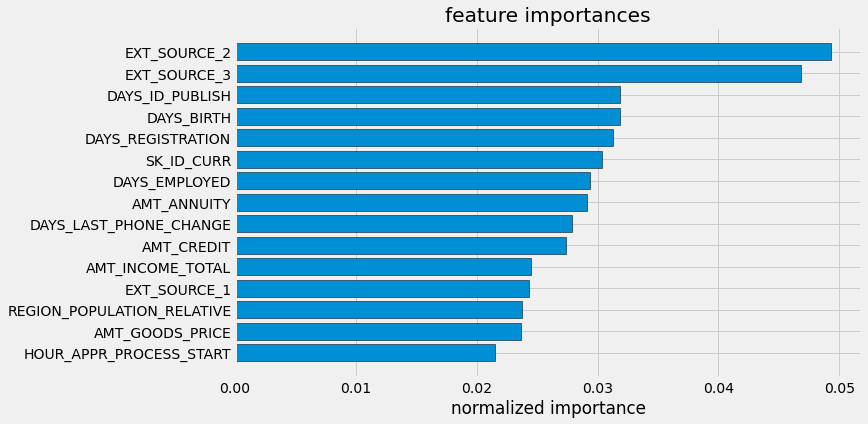

In [59]:
# 랜덤 포레스트 모델의 특성 중요도 시각화
feature_importances_sorted = plot_feature_importances(feature_importances)

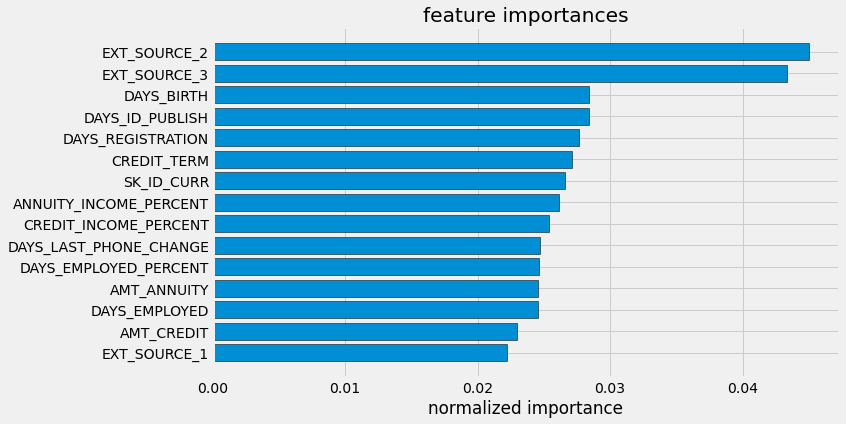

In [60]:
# 도메인 지식 피처를 포함한 랜덤 포레스트 모델의 특성 중요도 시각화
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

## 6. Just for Fun: Light Gradient Boosting Machine

In [61]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [63]:
def model(features, test_features, encoding='ohe', n_folds=5):
    '''
    교차 검증을 사용하여 lgbm 모델을 학습시키고 예측

    Parameters
    ----------
        - features (pd.DataFrame): 모델 학습에 사용할 데이터프레임. TARGET 피처를 가지고 있어야함.
        - test_features (pd.DataFrame): 모델 예측에 사용할 테스트 피처들의 데이터프레임.
        - encoding (str, default='ohe'): 카테고리형 변수 인코딩 방법. 'ohe'는 원-핫 인코딩을, 'le'은 라벨인코딩을 말함.
        - n_folds(int, default=5): 교차 검증시 사용할 폴드 수

    Return
    ----------
        - submission (pd.DataFrame): 'SK_ID_CURR'와 모델이 예측한 'TARGET'이 있는 데이터프레임
        - feature_importances (pd.DataFrame): 모델로부터 나온 feature importances로 된 데이터프레임
        - valid_metrics (pd.DataFrame): 각 폴드 및 전체적인 학습과 검증 평가지표(ROC-AUC)로 된 데이터프레임
    '''

    # id 추출
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']

    # 학습 데이터에서 target 추출
    labels = features['TARGET']

    # id와 target 제거
    features = features.drop(columns=['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns=['SK_ID_CURR'])

    # 카테고리 인덱스 저장 리스트
    # LightGBM 모델에게 알려주기 위함
    cat_indices = []

    # 카테고리형 변수 인코딩
    # 원-핫 인코딩
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)

        # 학습/테스트 데이터의 공통 피처만 보존
        features, test_features = features.align(
            test_features, join='inner', axis=1)

        cat_indices = 'auto'
    # 라벨 인코딩
    elif encoding == 'le':
        label_encoder = LabelEncoder()

        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # 카테고리 피처를 정수로 매핑
                features[col] = label_encoder.fit_transform(
                    np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(
                    np.array(test_features[col].astype(str)).reshape((-1,)))

                # 카테고리 인덱스 기록
                cat_indices.append(i)
    # 둘 다 아닐 경우 에러 발생
    else:
        raise ValueError('인코딩 형식은 "ohe"나 "le" 중 하나여야 합니다.')

    print('학습 데이터의 크기 :', features.shape)
    print('테스트 데이터의 크기 :', test_features.shape)

    # 피처 명 추출
    feature_names = list(features.columns)

    # np.array로 변환
    features = np.array(features)
    test_features = np.array(test_features)

    # KFold 객체 생성
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # 특성 중요도 기록을 위한 빈 배열 생성
    feature_importance_values = np.zeros(len(feature_names))

    # 테스트 데이터 예측을 기록하기 위한 빈 배열 생성
    test_predictions = np.zeros(test_features.shape[0])

    # 폴드 별 검증 데이터 예측을 기록하기 위한 빈 배열 생성
    out_of_fold = np.zeros(features.shape[0])

    # 학습과 검증 점수를 기록하기 위한 리스트
    valid_scores = []
    train_scores = []

    # 교차 검증
    for train_indices, valid_indices in k_fold.split(features):
        # 현재 폴드에서의 학습 데이터
        train_features, train_labels = features[train_indices], labels[train_indices]
        # 현재 폴드에서 검증 데이터
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]

        # LightGBM 모델 생성
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary',
                                   class_weight='balanced', learning_rate=0.05,
                                   reg_alpha=0.1, reg_lambda=0.1,
                                   subsample=0.8, n_jobs=-1,
                                   random_state=50)

        # 모델 학습
        model.fit(train_features, train_labels, eval_metric='auc',
                  eval_set=[(valid_features, valid_labels),
                           (train_features, train_labels)],
                  eval_names=['valid', 'train'],
                  categorical_feature=cat_indices,
                  early_stopping_rounds=100,
                  verbose=200)

        # 가장 성능이 좋은 이터레이션(iteration) 기록
        best_iteration = model.best_iteration_

        # 폴드 별 검증 데이터의 예측 기록
        out_of_fold[valid_indices] = model.predict_proba(
            valid_features, num_iteration=best_iteration)[:, 1]

        # 최고 점수 ROC-AUC 기록
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # 특성 중요도 기록
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # 테스트 데이터로 모델 예측
        test_predictions += model.predict_proba(
            test_features, num_iteration=best_iteration)[:, 1]

        # 가비지 콜렉터로 메모리 정리
        gc.enable()
        del model, train_features, valid_features
        gc.collect()

    # submission 포맷에 맞춰 데이터프레임 생성
    submission = pd.DataFrame(
        {'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # 특성 중요도 데이터프레임 생성
    feature_importances = pd.DataFrame(
        {'feature': feature_names, 'importance': feature_importance_values})
    
    # 최종 검증 점수
    valid_auc = roc_auc_score(labels, out_of_fold)
    # 최종 점수 기록
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # 폴드 별 점수 데이터프레임 생성
    metrics = pd.DataFrame({'fold': fold_names,
                           'train': train_scores,
                           'valid': valid_scores})
    
    return submission, feature_importances, metrics

In [64]:
submission, fi, metrics = model(app_train, app_test)
print('==== LightGBM 베이스라인 지표 ====')
print(metrics)

학습 데이터의 크기 : (307511, 239)
테스트 데이터의 크기 : (48744, 239)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.79887	train's binary_logloss: 0.547648	valid's auc: 0.754949	valid's binary_logloss: 0.563125
Early stopping, best iteration is:
[208]	train's auc: 0.80025	train's binary_logloss: 0.546264	valid's auc: 0.755109	valid's binary_logloss: 0.562276
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798518	train's binary_logloss: 0.548144	valid's auc: 0.758539	valid's binary_logloss: 0.563479
Early stopping, best iteration is:
[217]	train's auc: 0.801374	train's binary_logloss: 0.545314	valid's auc: 0.758619	valid's binary_logloss: 0.561732
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.79774	train's binary_logloss: 0.54923	valid's auc: 0.762652	valid's binary_logloss: 0.564246
[400]	train's auc: 0.827288	train's binary_logloss: 0.520152	valid's auc: 0.762202	valid's binary_logloss: 0.54657

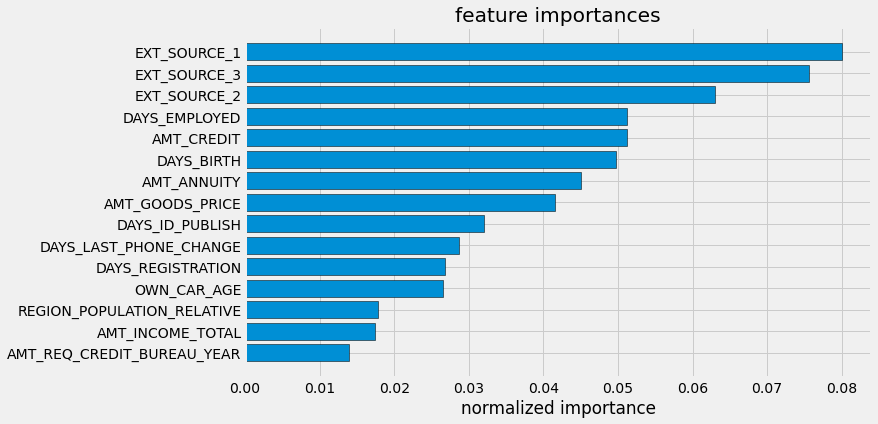

In [65]:
# 특성 중요도 시각화
fi_sorted = plot_feature_importances(fi)

In [66]:
# submission 파일 저장
submission.to_csv('../data/baseline_lgb_3.csv', index=False)

👉 **LightGBM 모델**의 ROC-AUC : 0.735

### 6.1. With Engineered Features

In [67]:
app_train_domain['TARGET'] = train_labels

# 모델 학습 및 예측
submission_domain, fi_domain, metrics_domain = model(
    app_train_domain, app_test_domain)

학습 데이터의 크기 : (307511, 243)
테스트 데이터의 크기 : (48744, 243)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804531	train's binary_logloss: 0.541661	valid's auc: 0.762577	valid's binary_logloss: 0.557281
Early stopping, best iteration is:
[237]	train's auc: 0.810671	train's binary_logloss: 0.535426	valid's auc: 0.762858	valid's binary_logloss: 0.553438
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804304	train's binary_logloss: 0.542018	valid's auc: 0.765594	valid's binary_logloss: 0.55808
Early stopping, best iteration is:
[227]	train's auc: 0.808665	train's binary_logloss: 0.537574	valid's auc: 0.765861	valid's binary_logloss: 0.555268
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.803753	train's binary_logloss: 0.542936	valid's auc: 0.770139	valid's binary_logloss: 0.557892
[400]	train's auc: 0.834338	train's binary_logloss: 0.511693	valid's auc: 0.770328	valid's binary_logloss: 0.53

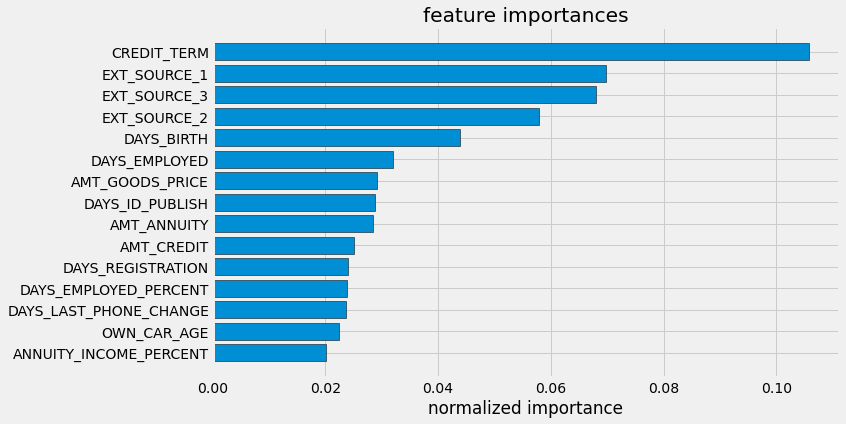

In [68]:
# 특성 중요도 시각화
fi_sorted = plot_feature_importances(fi_domain)

In [69]:
# submission 파일 저장
submission_domain.to_csv('../data/baseline_lgb_domain_features_3.csv', index=False)

👉 **도메인 지식 피처를 포함한 LightGBM 모델**의 ROC-AUC : 0.754